99.99% confident actual loss won't exceed: $-7864.89
99.00% confident actual loss won't exceed: $-3428.68
95.00% confident actual loss won't exceed: $-2053.73
Losses expected to exceed $-2053.73 on 63 out of 1271 days


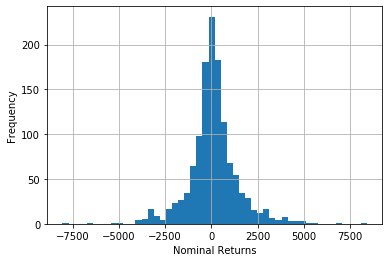

In [2]:
#Data manipulation
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt

#Data fetching
import pandas_datareader.data as data
import datetime

#Build Portfolio
tickers = ["BTC-USD", "ETH-USD", "DOGE-USD"]
exposures = [10000, 10000, 10000]

#Set timeframe
start = "2016-08-07"
end = datetime.date.today()

#Pull data from Yahoo! Finance
df = data.DataReader(tickers, data_source="yahoo", start=start, end=end)

#Calculate daily returns
percentage = df.pct_change()
percentage = percentage["Close"]

#Calculate return exposures
value_ptf = percentage * exposures

#Remove missing values
value_ptf.dropna()

#Calculate portfolio return
value_ptf['Value of Portfolio'] = value_ptf.sum(axis=1)
ptf_percentage = value_ptf['Value of Portfolio']
ptf_percentage = ptf_percentage.sort_values(axis=0, ascending=True)

#Set Confidence Levels
VaR1 =  np.percentile(ptf_percentage, .01)
VaR2 =  np.percentile(ptf_percentage, 1.0)
VaR3 =  np.percentile(ptf_percentage, 5.0)

#Calculate Value at Risk for the Portfolio
print ("99.99% confident actual loss won't exceed: $" + str(round(VaR1, 2)))
print ("99.00% confident actual loss won't exceed: $" + str(round(VaR2, 2)))
print ("95.00% confident actual loss won't exceed: $" + str(round(VaR3, 2))) 
print ("Losses expected to exceed $" + "{0:.2f}".format(VaR3) + " on " + str(int(.05*len(ptf_percentage))) + " out of " + str(len(ptf_percentage)) + " days")
percentage = percentage[1:]

#Plot histogram
mean = np.mean(ptf_percentage)
std_dev = np.std(ptf_percentage)
ptf_percentage.hist(bins=50)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.xlabel('Nominal Returns')
plt.ylabel('Frequency')
plt.show()
